In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.2,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess_without_growing",
                   "grow_from" : "output",
                   #"hessian_percentile" : 95,
                   #"grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 300,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (3,3),
                "tau" : (0.9, 0.95),
                #"ewc_lambda" : (200,200)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

In [3]:
import pickle
with open("logs/test_accs_matrix.pkl", "rb") as f:
    test_accs_matrix = pickle.load(f)
test_accs_matrix

array([[96.98, 17.97,  6.67,  8.88, 11.  , 18.12,  2.67, 14.04, 10.71,
         4.55],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ]])

In [4]:
# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [5]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [6]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [7]:
device = get_device(2)

## Get benchmarks

In [8]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [9]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-08-08 15:06:05,618] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
[I 2024-08-08 15:06:17,621] Trial 0 finished with value: 92.8435466666667 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.925357484410654}. Best is trial 0 with value: 92.8435466666667.


Non frozen params in layer 1 : 90000.0
Non frozen params in layer 2 : 3000.0


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 1/3 [00:01<00:02,  1.35s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 2/3 [00:02<00:01,  1.35s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
[I 2024-08-08 15:06:26,203] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
[I 2024-08-08 15:06:41,805] Trial 0 finished with value: 91.28929333333333 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.925357484410654}. Best is trial 0 with value: 91.28929333333333.


Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 1/3 [00:01<00:02,  1.39s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 2/3 [00:02<00:01,  1.36s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
[I 2024-08-08 15:06:50,671] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
[I 2024-08-08 15:07:11,274] Trial 0 finished with value: 86.49709333333334 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.925357484410654}. Best is trial 0 with value: 86.49709333333334.


Non frozen params in layer 1 : tensor(89552., device='cuda:2')
Non frozen params in layer 2 : tensor(2776., device='cuda:2')


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 1/3 [00:01<00:02,  1.40s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 2/3 [00:02<00:01,  1.39s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


100%|██████████| 3/3 [00:04<00:00,  1.40s/it]


## Visualize results

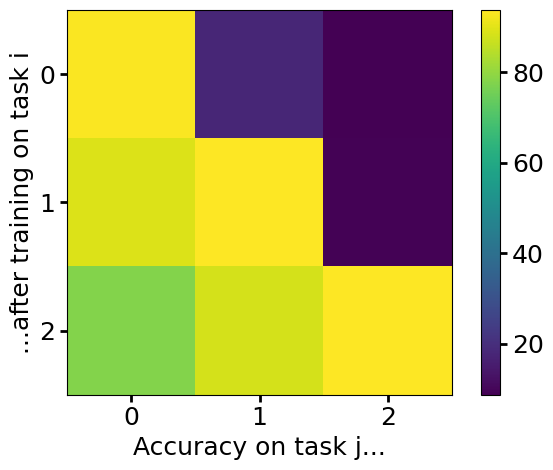

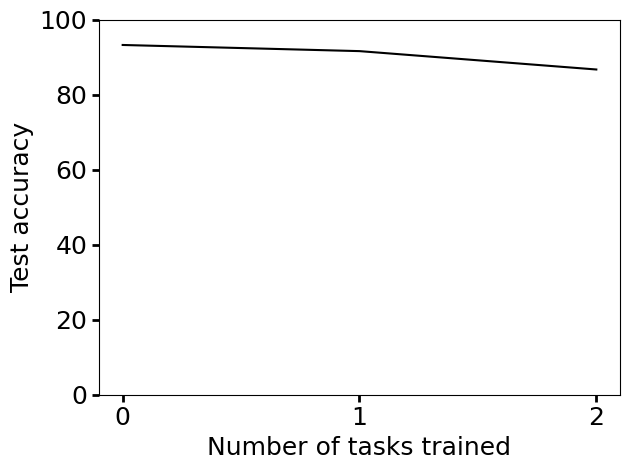

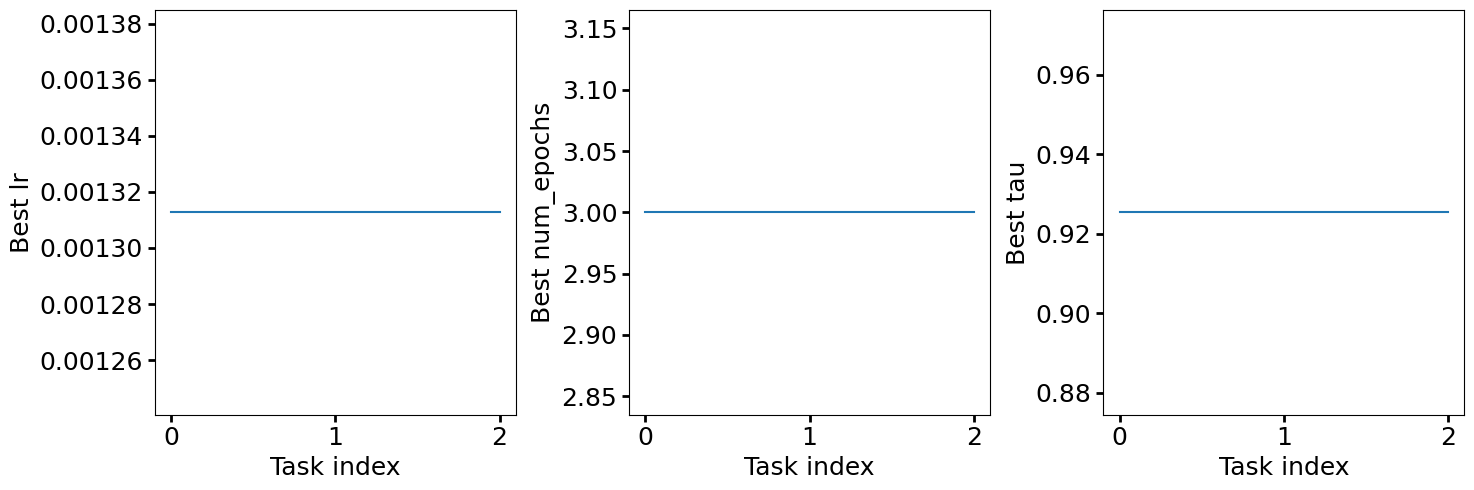

In [10]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [11]:
print(best_params_list)

[{'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.925357484410654}, {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.925357484410654}, {'lr': 0.0013127245462383958, 'num_epochs': 3, 'tau': 0.925357484410654}]


In [12]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
Non frozen params in layer 1 : 90000.0
Non frozen params in layer 2 : 3000.0


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 1/3 [00:01<00:02,  1.36s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 2/3 [00:02<00:01,  1.52s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


100%|██████████| 3/3 [00:04<00:00,  1.52s/it]



--------------------------------------------------
LEARNING TASK 2
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 1/3 [00:01<00:03,  1.52s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 2/3 [00:02<00:01,  1.40s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


100%|██████████| 3/3 [00:04<00:00,  1.38s/it]



--------------------------------------------------
LEARNING TASK 3
Non frozen params in layer 1 : tensor(89552., device='cuda:2')
Non frozen params in layer 2 : tensor(2552., device='cuda:2')


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 33%|███▎      | 1/3 [00:01<00:02,  1.32s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


 67%|██████▋   | 2/3 [00:02<00:01,  1.30s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10


100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


## Visualize validation

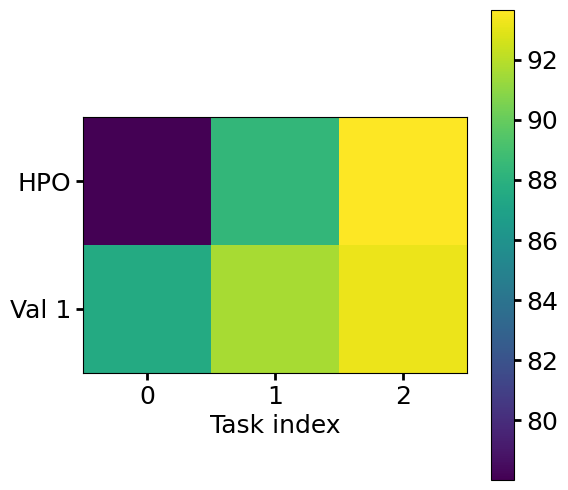

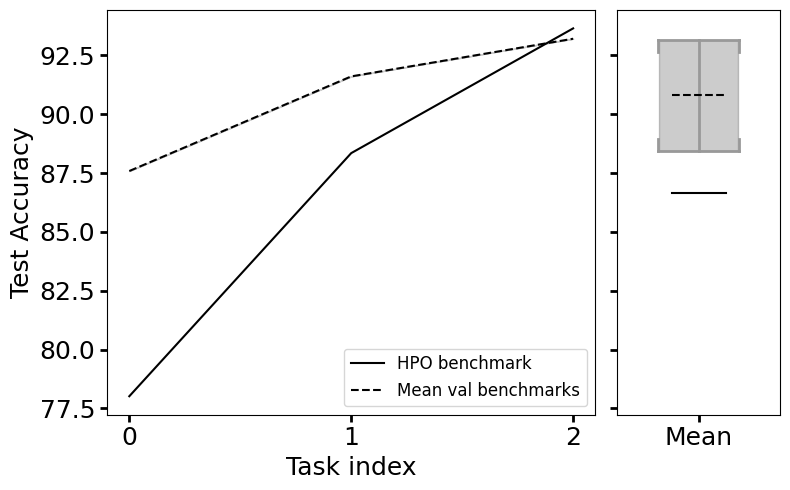

In [13]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [14]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)